In [1]:
%load_ext lab_black

In [2]:
# ライブラリーのインポート
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ボストンの住宅価格データ
from sklearn.datasets import load_boston

# 評価指標
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# データセットの読込み
boston = load_boston()

# 説明変数の格納
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数の追加
y = pd.DataFrame(boston.target)

In [4]:
# ランダムシード値
RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2

# 学習データと評価データの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [5]:
dire = "proc_folder"

# TPOTRegressorの設定
tpot = TPOTRegressor(
    scoring="neg_mean_absolute_error",
    generations=5,
    population_size=100,
    random_state=42,
    verbosity=2,
    n_jobs=-1,
    periodic_checkpoint_folder=dire,
)

In [6]:
%%time
tpot.fit(X_train, y_train)

/tmp/Python/python-3.9.6/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.1387057547604975

Generation 2 - Current best internal CV score: -2.110103247701386

Generation 3 - Current best internal CV score: -2.110103247701386

Generation 4 - Current best internal CV score: -2.110103247701386

Generation 5 - Current best internal CV score: -2.066290312736627

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=7, max_features=0.55, min_samples_leaf=7, min_samples_split=4, n_estimators=100, subsample=0.9000000000000001)
CPU times: user 3min 23s, sys: 11.6 s, total: 3min 35s
Wall time: 19min 25s


TPOTRegressor(generations=5, n_jobs=-1,
              periodic_checkpoint_folder='proc_folder', random_state=42,
              scoring='neg_mean_absolute_error', verbosity=2)

In [7]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.95, loss='huber',
                                           max_depth=7, max_features=0.55,
                                           min_samples_leaf=7,
                                           min_samples_split=4, random_state=42,
                                           subsample=0.9000000000000001))])

In [8]:
y_pred = tpot.predict(X_test)

Text(0, 0.5, 'y_test')

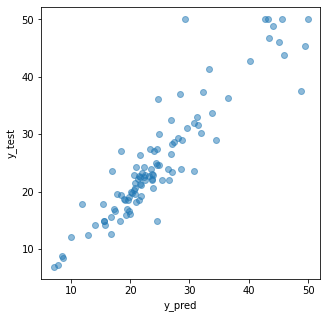

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y_pred")
plt.ylabel("y_test")

In [10]:
# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame(
        {
            "R2": r2_score(true, pred),
            "MAE": mean_absolute_error(true, pred),
            "MSE": mean_squared_error(true, pred),
            "RMSE": np.sqrt(mean_squared_error(true, pred)),
        },
        index=["scores"],
    )
    return scores


scores = calculate_scores(y_test, y_pred)
print(scores)

              R2       MAE        MSE      RMSE
scores  0.838489  2.669996  16.890912  4.109855
